In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from collections import namedtuple

import seaborn as sns

### General Processing

In [7]:
main = pd.read_excel('movantanalysis.xlsx', sheet_name = 'KM Data Edits')
datapull = pd.read_excel('movantanalysis.xlsx', sheet_name = 'Data Pull Sheet')
aums = pd.read_excel('movantanalysis.xlsx', sheet_name = 'All Institution AUMs')
removed = pd.read_excel('movantanalysis.xlsx', sheet_name = 'Removed cases')

In [8]:
movant_categories = main["Movant ID"].str.split(".", n=2, expand = True)
main['Movant Group'] = movant_categories[0]+movant_categories[1]

In [9]:
main = main.merge(aums[['Institutional Movant', 'AUM']], how = 'left', left_on = 'Movant', right_on = 'Institutional Movant')

In [10]:
main = main.merge(datapull[['Ticker','Damage Bucket', "Filing Firm"]], how = 'left', on = 'Ticker')

In [11]:
main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"] = main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"].str.replace("InS", "Ins")
main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"] = main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"].str.replace("ins", "Ins")
main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"] = main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"].str.replace("G-mix", "G-Mix")
main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"] = main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"].str.replace("ind", "Ind")
main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"] = main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"].str.replace("g-Ind", "G-Ind")

In [12]:
main["Small Case"] = 0
main.loc[main["Damage Bucket"].isin(["A","B"]), "Small Case"] = 1 

### I. MOVANT ANALYSIS BY REPORTED DAMAGES BY BUCKET

#### I. A. Number of Cases by Bucket

In [13]:
data_1a = datapull['Damage Bucket'].value_counts()

In [14]:
y_val = data_1a.sort_index()
x_val = data_1a.sort_index().index

<Figure size 432x288 with 0 Axes>

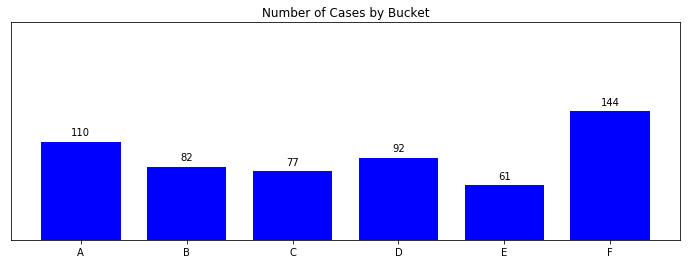

In [15]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,4))
width = 0.75
ind = np.arange(len((y_val)))
plt.title('Number of Cases by Bucket')
plt.yticks([], [])
ax.bar(x_val, y_val, width, color = "blue")

ax.set_ylim([0,y_val.max()+ 100])

rects = ax.patches

ax.yaxis.set_ticks_position('none')

for rect, label in zip(rects, y_val):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.show()

#### I.B. Analysis by Bucket

In [16]:
data_1b = datapull[['Damage Bucket', 'Docket Number','Total Damages', '% of Total Damages']].dropna()
data_1b['Total Damages'] = pd.to_numeric(data_1b['Total Damages'], errors='coerce').fillna(0)
data_1b['% of Total Damages'] = pd.to_numeric(data_1b['% of Total Damages'], errors='coerce').fillna(0)

In [17]:
data_1b_total = data_1b[['Damage Bucket', 'Docket Number','Total Damages']]
data_1b_describe_total = data_1b_total.pivot(index = 'Docket Number', columns = 'Damage Bucket', values = 'Total Damages')
data_1b_describe_total = data_1b_describe_total.describe()
data_1b_describe_total = pd.concat([data_1b_describe_total, pd.DataFrame(np.sort(data_1b_total.pivot(index = 'Docket Number', columns = 'Damage Bucket', values = 'Total Damages').fillna(0), axis = 0)[-2:,:], columns = data_1a.sort_index().index, index = ['Largest', '2nd Largest'])])

In [18]:
data_1b_bps = data_1b[['Damage Bucket', 'Docket Number','% of Total Damages']]
data_1b_describe_bps = data_1b_bps.pivot(index = 'Docket Number', columns = 'Damage Bucket', values = '% of Total Damages')
data_1b_describe_bps = data_1b_describe_bps.describe()
data_1b_describe_bps = pd.concat([data_1b_describe_bps, pd.DataFrame(np.sort(data_1b_bps.pivot(index = 'Docket Number', columns = 'Damage Bucket', values = '% of Total Damages'), axis = 0)[-2:,:], columns = data_1a.sort_index().index, index = ['Largest', '2nd Largest'])])

In [19]:
x_val = np.sort(data_1b['Damage Bucket'].unique())

<Figure size 432x288 with 0 Axes>

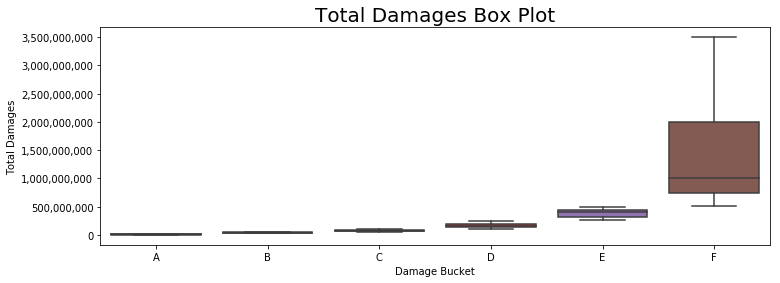

In [20]:
plt.clf()
plt.figure(figsize=(12,4))
plt.title("Total Damages Box Plot", size = 20)
ax = sns.boxplot(y = 'Total Damages', x = 'Damage Bucket', data = data_1b_total, order = x_val, showfliers=False)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda y, p: format(int(y), ',')))
plt.show()

In [16]:
pd.options.display.float_format = '{:.0f}'.format
print("By Total Damage")
data_1b_describe_total

By Total Damage


Damage Bucket,A,B,C,D,E,F
count,110,82,77,92,61,144
mean,11848636,38815854,75870130,171467391,392967213,2385520833
std,7383037,6610158,14436203,42049539,76220506,4046534549
min,0,26000000,52000000,102000000,260000000,515000000
25%,5625000,35000000,65000000,135000000,325000000,747500000
50%,10000000,40000000,75000000,162500000,400000000,1000000000
75%,17750000,45000000,90000000,200000000,450000000,2000000000
max,25000000,50000000,100000000,250000000,500000000,25000000000
Largest,25000000,50000000,100000000,250000000,500000000,25000000000
2nd Largest,25000000,50000000,100000000,250000000,500000000,25000000000


In [17]:
print("Two Largest Damages")

Two Largest Damages


In [18]:
pd.options.display.float_format = '{:.0f}'.format
pd.DataFrame(np.sort(data_1b_total.pivot(index = 'Docket Number', columns = 'Damage Bucket', values = 'Total Damages').fillna(0), axis = 0)[-2:,:], columns = data_1a.sort_index().index, index = ['Largest', '2nd Largest'])

,A,B,C,D,E,F
Largest,25000000,50000000,100000000,250000000,500000000,25000000000
2nd Largest,25000000,50000000,100000000,250000000,500000000,25000000000


In [19]:
pd.options.display.float_format = '{:,.2%}'.format
print("By BPS")
data_1b_describe_bps

By BPS


Damage Bucket,A,B,C,D,E,F
count,"11,000.00%","8,200.00%","7,700.00%","9,200.00%","6,100.00%","14,400.00%"
mean,2.82%,1.14%,0.34%,0.49%,0.30%,0.40%
std,5.56%,2.06%,0.85%,1.02%,0.60%,1.03%
min,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
25%,0.09%,0.05%,0.01%,0.04%,0.01%,0.00%
50%,0.70%,0.33%,0.09%,0.16%,0.06%,0.04%
75%,2.57%,1.42%,0.29%,0.40%,0.28%,0.23%
max,34.72%,13.61%,6.80%,6.43%,3.06%,7.29%
Largest,nan%,nan%,nan%,nan%,nan%,nan%
2nd Largest,nan%,nan%,nan%,nan%,nan%,nan%


#### I.C. Win-Loss Analysis

In [20]:
print("TBD")

TBD


### II. ANALYSIS BY TYPE OF MOVANT

#### II. A. Number of Movants by Bucket

In [21]:
data_2a = main["Damage Bucket"].value_counts()

In [22]:
y_val = data_2a.sort_index()
x_val = data_2a.sort_index().index

<Figure size 432x288 with 0 Axes>

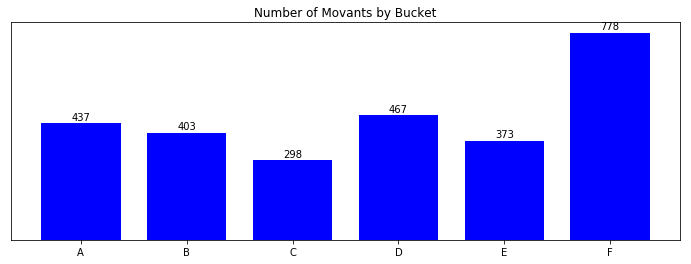

In [23]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,4))
width = 0.75
ind = np.arange(len((y_val)))
plt.title('Number of Movants by Bucket')
plt.yticks([], [])
ax.bar(x_val, y_val, width, color = "blue")

rects = ax.patches

ax.yaxis.set_ticks_position('none')

for rect, label in zip(rects, y_val):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.show()

#### II.B. Number of Movants by Case

In [26]:
data_2b = main.groupby("Ticker")["Movant ID"].count().reset_index()
data_2b_describe = data_2b.describe()

In [27]:
pd.options.display.float_format = '{:.2f}'.format
data_2b_describe

,Movant ID
count,549.00
mean,5.22
std,4.03
min,1.00
25%,2.00
50%,4.00
75%,7.00
max,26.00


#### II.C. Movant By Type By Bucket

In [28]:
data_2c = main[["Damage Bucket", "Type (Ind, Ins, G-Ind, G-Ins, G-Mix)", "Movant ID"]]

In [35]:
data_2c_grouped = data_2c.groupby(["Damage Bucket", "Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"])["Movant ID"].count().reset_index()

In [36]:
data_2c_grouped

,Damage Bucket,"Type (Ind, Ins, G-Ind, G-Ins, G-Mix)",Movant ID
0,A,G-Ind,244
1,A,G-Ins,8
2,A,G-Mix,14
3,A,Ind,153
4,A,Ins,18
5,B,G-Ind,238
6,B,G-Ins,5
7,B,G-Mix,19
8,B,Ind,121
9,B,Ins,20


#### II.D. For Groups

In [32]:
data_2d = main[["Movant Group", "Type (Ind, Ins, G-Ind, G-Ins, G-Mix)", "Movant Loss", "# of Movant Groups"]]
data_2d_groupcount = data_2d.groupby("Type (Ind, Ins, G-Ind, G-Ins, G-Mix)")["# of Movant Groups"].mean()
data_2d_groupcount = data_2d_groupcount.append(pd.Series(main["# of Movant Groups"].mean(), index = ["Total"]))
data_2d_loss = data_2d.groupby("Type (Ind, Ins, G-Ind, G-Ins, G-Mix)")["Movant Loss"].mean()
data_2d_loss = data_2d_loss.append(pd.Series(main["Movant Loss"].mean(), index = ["Total"]))

In [33]:
data_2d = pd.concat([data_2d_groupcount, data_2d_loss], axis = 1)
data_2d.columns = ["Avg # of Groups", "Avg Losses"]

In [34]:
data_2d

,Avg # of Groups,Avg Losses
G-Ind,2.95,124115.89
G-Ins,3.69,1940241.80
G-Mix,3.92,825217.99
Ind,3.01,282381.10
Ins,3.16,2354680.71
Total,3.11,685731.86


#### II.D. For Unopposed Lead Plaintiff Motions

In [37]:
print("TBD")

TBD


#### II.E. Gun to Knife Fight Analysis

In [38]:
data_2e = main[["Small Case", "Type", "Ticker"]]

In [39]:
data_2e_institution_involved = data_2e[data_2e["Type"]=="Institution"]["Ticker"]

In [43]:
data_2e = data_2e.assign(Inst_Involved = 0)
data_2e.loc[data_2e["Ticker"].isin(data_2e_institution_involved), "Inst_Involved"] = 1

In [44]:
data2e_counts = data_2e.groupby(["Small Case", "Institution Involved"])["Ticker"].count().reset_index()

In [45]:
data2e_counts

,Small Case,Institution Involved,Ticker
0,0,0,555
1,0,1,1470
2,1,0,597
3,1,1,243


In [46]:
print("Win Analysis: TBD")

Win Analysis: TBD


### III. ANALYSIS BY INSTITUTIONAL MOVEMENT TYPE

#### III. A. Institutional Movants by Bucket

In [47]:
data_3a = main.groupby('Damage Bucket')['Institutional Movant'].count()

In [48]:
y_val = data_3a.sort_index()
x_val = data_3a.sort_index().index

<Figure size 432x288 with 0 Axes>

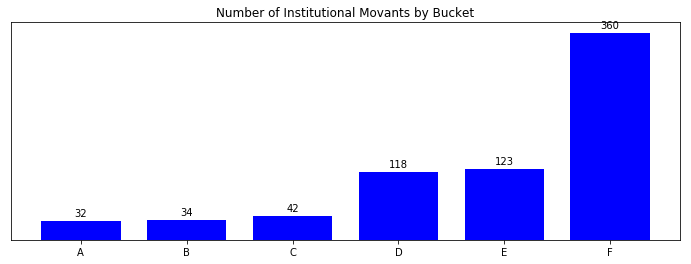

In [49]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,4))
width = 0.75
ind = np.arange(len((y_val)))
plt.title('Number of Institutional Movants by Bucket')
plt.yticks([], [])
ax.bar(x_val, y_val, width, color = "blue")

rects = ax.patches

ax.yaxis.set_ticks_position('none')

for rect, label in zip(rects, y_val):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.show()

#### III.B Average Loss By Institutional Movant by Bucket

In [50]:
data_3b = main[['Damage Bucket',  "Institutional Movant", 'Movant Loss']].dropna()
data_3b_describe = data_3b.pivot(columns = 'Damage Bucket', values = 'Movant Loss')
data_3b_describe = data_3b_describe.describe()

In [51]:
pd.options.display.float_format = '{:.0f}'.format
data_3b_describe

Damage Bucket,A,B,C,D,E,F
count,32,34,42,117,117,351
mean,466336,410495,442968,695454,1153065,3465671
std,1365148,557007,898744,1517956,2921750,7572463
min,875,5401,1559,112,1609,2700
25%,50178,84905,52432,107970,123654,275101
50%,136731,146034,152792,248948,303220,795783
75%,281768,669567,391554,601702,990919,2485592
max,7793640,2479670,4725022,11577603,23517243,64910560


#### III.C. Average Loss By Winning Institutional Movant by Bucket

In [52]:
pd.options.display.float_format = '{:.0f}'.format
data_3c = main[['Damage Bucket',  "Institutional Movant", 'Ticker', 'Movant Loss']].dropna()
data_3c_describe = data_3c.pivot(columns = 'Damage Bucket', values = 'Movant Loss')
data_3c_describe = data_3c_describe.describe()

In [53]:
data_3c_describe

Damage Bucket,A,B,C,D,E,F
count,32,34,42,117,117,351
mean,466336,410495,442968,695454,1153065,3465671
std,1365148,557007,898744,1517956,2921750,7572463
min,875,5401,1559,112,1609,2700
25%,50178,84905,52432,107970,123654,275101
50%,136731,146034,152792,248948,303220,795783
75%,281768,669567,391554,601702,990919,2485592
max,7793640,2479670,4725022,11577603,23517243,64910560


#### III.D. Average AUM of Institutional Movant by Bucket
##### Note: Count Includes Only Institutional Movants with AUMs

In [54]:
data_3d = main[['Damage Bucket',  "Institutional Movant", "AUM"]].dropna()
data_3d_describe = data_3d.pivot(columns = 'Damage Bucket', values = 'AUM')
data_3d_describe = data_3d_describe.describe()

In [55]:
pd.options.display.float_format = '{:.0f}'.format
data_3d_describe

Damage Bucket,A,B,C,D,E,F
count,16,19,26,97,101,303
mean,2088157686,3788363971,11190254133,4100593480,12423699794,37333336611
std,4039244434,7160045909,47327837378,14431406900,38554857229,123323704393
min,801120,12000000,517000,23351741,517000,517000
25%,20875000,381315000,107233000,365560000,302890000,470168750
50%,259562406,762562834,504367917,884718824,1013288083,2594738556
75%,1370571337,2178642302,1412524951,2130049570,3247579403,14406000000
max,14406000000,28766141000,242262242175,135270275000,242262242175,1515000000000


#### III.E. Frequent Flyer Analysis

#### III.E.1. Movant Type

In [56]:
data_3e = main[["Institutional Movant", "Damage Bucket", "Type (Ind, Ins, G-Ind, G-Ins, G-Mix)", 'Investor Frequent Flyer', 'Movant Loss', "Filing Firm"]]
data_3e = data_3e[~data_3e["Institutional Movant"].isna()]
data_3e.loc[(data_3e["Investor Frequent Flyer"].isna()),"Investor Frequent Flyer"] = "NotFF"

In [57]:
data_3e1 = data_3e.groupby(["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)", "Investor Frequent Flyer"])["Institutional Movant"].count().reset_index().sort_values("Type (Ind, Ins, G-Ind, G-Ins, G-Mix)")

In [58]:
y_val1 = data_3e1[data_3e1["Investor Frequent Flyer"]== "FF"]["Institutional Movant"]
y_val2 = data_3e1[data_3e1["Investor Frequent Flyer"]== "NotFF"]["Institutional Movant"]
x_val = data_3e1[data_3e1["Investor Frequent Flyer"]== "FF"]["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"]

In [59]:
data_3e1

,"Type (Ind, Ins, G-Ind, G-Ins, G-Mix)",Investor Frequent Flyer,Institutional Movant
0,G-Ins,FF,142
1,G-Ins,NotFF,92
2,G-Mix,FF,14
3,G-Mix,NotFF,51
4,Ins,FF,255
5,Ins,NotFF,161


#### By Bucket

In [65]:
data_3e2 = data_3e.groupby(["Damage Bucket", "Investor Frequent Flyer"])["Institutional Movant"].count().reset_index().sort_values("Damage Bucket")

In [66]:
data_3e2

,Damage Bucket,Investor Frequent Flyer,Institutional Movant
0,A,FF,11
1,A,NotFF,21
2,B,FF,14
3,B,NotFF,20
4,C,FF,18
5,C,NotFF,24
6,D,FF,67
7,D,NotFF,51
8,E,FF,69
9,E,NotFF,54


#### By Filing Firm

In [70]:
data_3e["Filing Firm"] = data_3e["Filing Firm"].astype(str)

In [71]:
data_3e3 = data_3e.groupby(["Filing Firm", "Investor Frequent Flyer"])["Institutional Movant"].count().reset_index().sort_values("Filing Firm")

In [72]:
data_3e3

,Filing Firm,Investor Frequent Flyer,Institutional Movant
0,00:00:00,FF,8
1,00:00:00,NotFF,2
2,"Abraham, Fruchter & Twersky, LLP; Block & Levi...",NotFF,1
3,"Abraham, Fruchter & Twersky, LLP; Bronstein, G...",FF,1
4,"Abraham, Fruchter & Twersky, LLP; Bronstein, G...",NotFF,2
5,"Abraham, Fruchter & Twersky, LLP; Kendall Law ...",FF,1
6,"Abraham, Fruchter & Twersky, LLP; Robbins, Gel...",NotFF,1
7,"Ademi & O'Reilly, LLP; Barrack Rodos & Bacine...",FF,1
8,"Andrews & Springer, LLC; Bernstein Litowitz Be...",FF,5
9,"Andrews & Springer, LLC; Bernstein Litowitz Be...",NotFF,4


### APPENDIX

plt.clf()
plt.bar(x_val, y_val, color="b")
plt.title('Number of Cases by Bucket')
plt.show()

plt.clf()
fig, ax = plt.subplots(figsize=(12,4))
width = 0.75
ind = np.arange(len((y_val)))
ticks = np.array([2,4,6,8,10])

plt.title('Number of Institutional Movants by Bucket')

ax.bar(ticks, y_val1, width, color = "blue")
ax.bar(ticks + np.repeat(width, len(x_val)), y_val2, width, color = "orange")

plt.yticks([], [])

ax.set_ylim([0,y_val2.max()+ 100])

rects = ax.patches
ax.yaxis.set_ticks_position('none')

for i in range(len(x_val)):
    height = rects[i].get_height()
    ax.text(rects[i].get_x() + rects[i].get_width() / 2, height + 5, y_val1[i],
            ha='center', va='bottom')
    ax.text(rects[i].get_x() + rects[i].get_width() / 2, height + 5, y_val2[i],
            ha='center', va='bottom')
    
plt.xticks(ticks, c_val)

plt.show()

#### Number of Cases by Bucket

y_val = datapull['Damage Bucket'].value_counts().sort_index()
x_val = datapull['Damage Bucket'].value_counts().sort_index().index

plt.clf()
plt.bar(x_val, y_val, color="b")
plt.show()

bucketmovantcount = main['Damage Bucket'].value_counts().sort_index()

bucketmovantcount

fig, ax = plt.subplots() 

ind = np.arange(len(y_val))
bar_width = 0.75

ax.bar(ind, y_val, bar_width, col = 'b')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue')

plt.title('Number of Classes by Bucket', size = 16)

fig.tight_layout()

plt.show()

buckets = main["Damage Bucket"].sort_values().dropna().unique()
types = main["Type (Ind, Ins, G-Ind, G-Ins, G-Mix)"].sort_values().dropna().unique()

xval = buckets
yval = []

for i in buckets: 
    yval.append(data_2c_grouped[i][types])

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,4))
width = 0.75
ind = np.arange(len((y_val)))
ticks = np.array([2,4,6,8,10])

plt.title('Number of Movants by Type for Each Bucket')

for i in yval
ax.bar(ticks, y_val1, width, color = "blue")
ax.bar(ticks + np.repeat(width, len(x_val)), y_val2, width, color = "orange")

plt.yticks([], [])

ax.set_ylim([0,y_val2.max()+ 100])

rects = ax.patches
ax.yaxis.set_ticks_position('none')

for i in range(len(x_val)):
    height = rects[i].get_height()
    ax.text(rects[i].get_x() + rects[i].get_width() / 10 + , height + 5, y_val1[i],
            ha='center', va='bottom')
    ax.text(rects[i].get_x() + rects[i].get_width() / i*2, height + 5, y_val2[i],
            ha='center', va='bottom')
    
plt.xticks(ticks, c_val)

plt.show()